<a href="https://colab.research.google.com/github/DAWUNHAN/deeplearning-fundamental/blob/master/5-%EC%8B%A0%EA%B2%BD%EB%A7%9D_%EC%98%88%EC%A0%9C_(IMDB_%EC%98%81%ED%99%94_%EB%A6%AC%EB%B7%B0%EB%A5%BC_%EA%B8%8D%EC%A0%95_%EB%B6%80%EC%A0%95_%EC%9D%B4%EC%A7%84_%EB%B6%84%EB%A5%98%ED%95%98%EA%B8%B0).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMDB 영화 리뷰를 긍정/부정 이진 분류하기
- 데이터셋 : imdb (학습 25,000개, 테스트 25,000개)

## 1. 데이터셋 로드하기

In [1]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)
# num_words=10000은 가장 자주 나타나는 단어 만개만 사용하기 위함. 

17473536/17464789 [==============================] - 0s 0us/step


### 영화 리뷰가 어떤 형태인지 확인

In [11]:
# word_index는 {단어:인덱스} 형태의 딕셔너리.
word_index = imdb.get_word_index()

# reverse_word_index는 {인덱스:단어} 형태의 딕셔너리.
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()] )

decoded_review = ' '.join(
    [reverse_word_index.get(i-3, '?') for i in train_data[0]]
)

In [8]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

### 데이터 전처리
- 리스트를 원-핫 인코딩을 이용하여 0, 1 형태로 변환한다. 
즉, [2, 5]일 때 인덱스 2와 5에서는 1을 주고 그 이외에는 0을 입력한다.

In [15]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
  result = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    result[i, sequence] = 1.
  return result

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [16]:
(x_train.shape, x_test.shape)

((25000, 10000), (25000, 10000))

## 신경망 모델
- 은닉층 2개 : 각 16개의 노드를 가짐. 
- 출력층 :  스칼라 값의 예측 출력

In [18]:
# 모델 정의

from keras import models, layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000, )))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

### 모델 컴파일
- 손실함수 : binary_crossentropy
- optimizer : rmsprop

In [19]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

### 훈련 검증

In [21]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = train_labels[:10000]
partial_y_train = train_labels[10000:]

In [23]:
history = model.fit(partial_x_train,
                    partial_y_train, 
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 3s 45ms/step - loss: 0.5159 - accuracy: 0.7860 - val_loss: 0.3811 - val_accuracy: 0.8716
Epoch 2/20
30/30 [==============================] - 1s 20ms/step - loss: 0.2983 - accuracy: 0.9031 - val_loss: 0.3216 - val_accuracy: 0.8742
Epoch 3/20
30/30 [==============================] - 1s 19ms/step - loss: 0.2160 - accuracy: 0.9301 - val_loss: 0.2852 - val_accuracy: 0.8869
Epoch 4/20
30/30 [==============================] - 1s 21ms/step - loss: 0.1682 - accuracy: 0.9442 - val_loss: 0.2748 - val_accuracy: 0.8888
Epoch 5/20
30/30 [==============================] - 1s 20ms/step - loss: 0.1351 - accuracy: 0.9554 - val_loss: 0.2846 - val_accuracy: 0.8882
Epoch 6/20
30/30 [==============================] - 1s 20ms/step - loss: 0.1104 - accuracy: 0.9659 - val_loss: 0.3119 - val_accuracy: 0.8808
Epoch 7/20
30/30 [==============================] - 1s 20ms/step - loss: 0.0866 - accuracy: 0.9743 - val_loss: 0.3408 - val_accuracy: 0.8761
Epoch 8/20
30

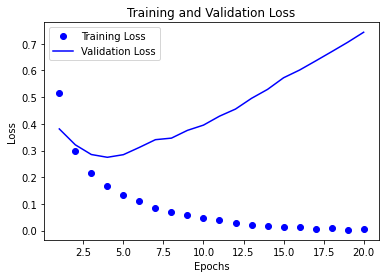

In [24]:
import matplotlib.pyplot as plt

history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

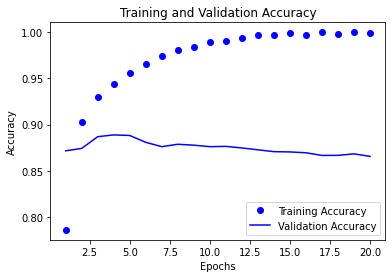

In [29]:
plt.clf()
history_dict = history.history
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [31]:
results = model.evaluate(x_test, test_labels)
results

782/782 [==============================] - 3s 3ms/step - loss: 0.8120 - accuracy: 0.8531


[0.8120064735412598, 0.8531200289726257]